# Credit Card Fraud Detection

### Context


"It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase."

### Content

"The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data."

### Goal

Identify fraudulent credit card transactions.

### Load the data

In [122]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
dataset = read.csv('creditcard.csv')


In [124]:
# Take a look at first four observations
head(dataset, 4)


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.277837576,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.638671953,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.771679402,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.10830045,0.005273597,-0.1903205,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0


In [125]:
# We do not need 'Time' column
dataset$Time <- NULL


In [3]:
# See the number of rows and columns in the dataset
sprintf("Number of Rows: %d    Number of Columns: %d",nrow(dataset), length(names(dataset)))


[1] "Number of Rows: 284807    Number of Columns: 30"

### Explore the data

In [74]:
# Take a quick look at columns and data types of each column
str(dataset)


'data.frame':	284807 obs. of  30 variables:
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V18   : num  0.0258 -0.1834 -0.1214 1.965

In [75]:
# See the min, max, 1st quartile, 3rd quartile, mean, and median of each column
summary(dataset)


       V1                  V2                  V3                 V4          
 Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256   Min.   :-5.68317  
 1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904   1st Qu.:-0.84864  
 Median :  0.01811   Median :  0.06549   Median :  0.1799   Median :-0.01985  
 Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000   Mean   : 0.00000  
 3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272   3rd Qu.: 0.74334  
 Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826   Max.   :16.87534  
       V5                   V6                 V7                 V8           
 Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572   Min.   :-73.21672  
 1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541   1st Qu.: -0.20863  
 Median :  -0.05434   Median : -0.2742   Median :  0.0401   Median :  0.02236  
 Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000   Mean   :  0.00000  
 3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [76]:
# Define a function that outputs a quick data quality report.

data_report <- function(df) {
  
  #DataFrame with column names and their data types
  data_types <- data.frame('data_type'= sapply(df, class))

  #DataFrame with Count
  data_count <- data.frame('count' = colSums(!is.na(df)))

  #DataFrame with unique values
  unique_value_counts <- data.frame('unique_values'= sapply(df, function(x) length(unique(x))))
 
  #Dataframe with number of missing values for each column
  missing_data_counts <- data.frame('missing_values'= sapply(df, function(x) sum(length(which(is.na(x))))))
  
  #Combine all dataframes
  data_quality_report <- cbind(data_types, data_count, unique_value_counts, missing_data_counts )
  print('Data Quality Report')

  return(data_quality_report)
}
                                                             

In [77]:
# See the result of function on the dataset
data_report(dataset)


[1] "Data Quality Report"


,data_type,count,unique_values,missing_values
V1,numeric,284807,275663,0
V2,numeric,284807,275663,0
V3,numeric,284807,275663,0
V4,numeric,284807,275663,0
V5,numeric,284807,275663,0
V6,numeric,284807,275663,0
V7,numeric,284807,275663,0
V8,numeric,284807,275663,0
V9,numeric,284807,275663,0
V10,numeric,284807,275663,0


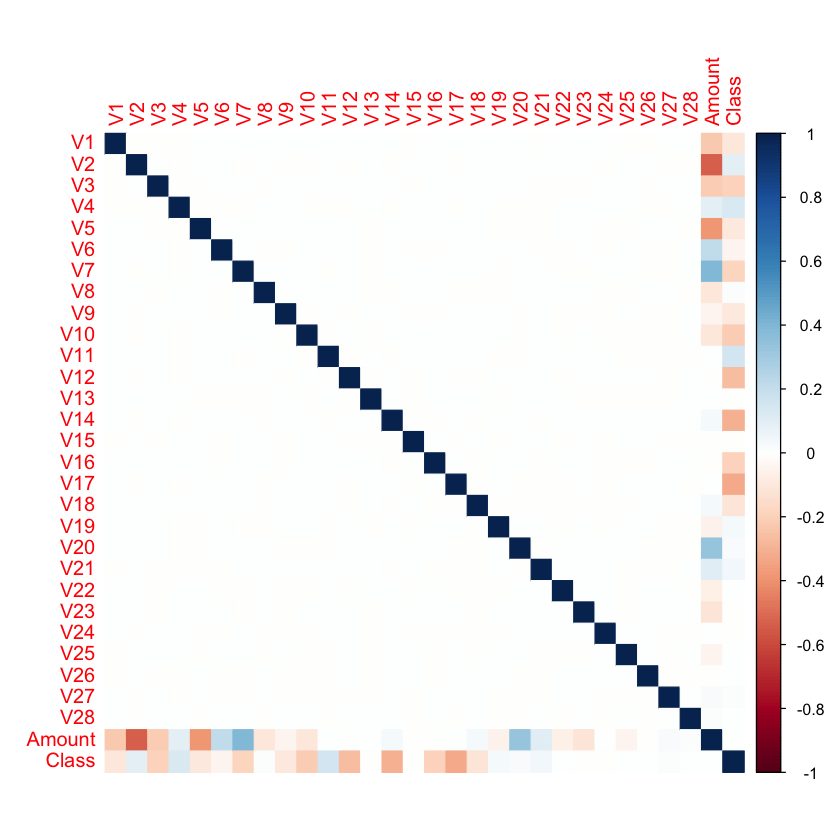

In [78]:
# install.packages('corrplot')
library(corrplot)
# See the correlation between features in the dataset
correlations <- cor(dataset)
corrplot(correlations, method="color")


In [79]:
# Chack number of fraud and non-fraud transactions
table(dataset$Class)



     0      1 
284315    492 

Most machine learning algorithms are sensitive to unbalance in the predictor classes. A machine learning model that has been trained and tested on such a dataset could now predict “non_fraud” for all samples and still gain a very high accuracy. An unbalanced dataset will bias the prediction model towards the more common class!



In [80]:
# Check the percentage of two classes
prop.table(table(dataset$Class))*100




         0          1 
99.8272514  0.1727486 

As you can see, the dataset contains less than 1% of positive cases and more than 99% of negative cases. This is a prime example of a severely imbalanced dataset. So, how badly can this affect our prediction accuracy ? Let’s build a model on this dataset. I’ll be using decision tree algorithm for modeling purpose.

In [127]:
# Scale 'Amount' column
dataset$Amount <- scale(dataset$Amount)
head(dataset, 4)



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,⋯,-0.01830678,0.277837576,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.2449638,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,⋯,-0.22577525,-0.638671953,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.3424739,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,⋯,0.24799815,0.771679402,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.1606839,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,⋯,-0.10830045,0.005273597,-0.1903205,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.1405340,0


In [130]:
# Convert 'Class' column from integer to factor type
dataset$Class <- factor(dataset$Class, labels = c('FALSE', 'TRUE'))
head(dataset$Class)


[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

### Feature importance

In [5]:
#install.packages("randomForest")
library(randomForest)
# Train a randomforset on the dataset to see the feature importance
rf_dataset <- randomForest(Class ~ ., dataset, ntree=100, importance=T)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

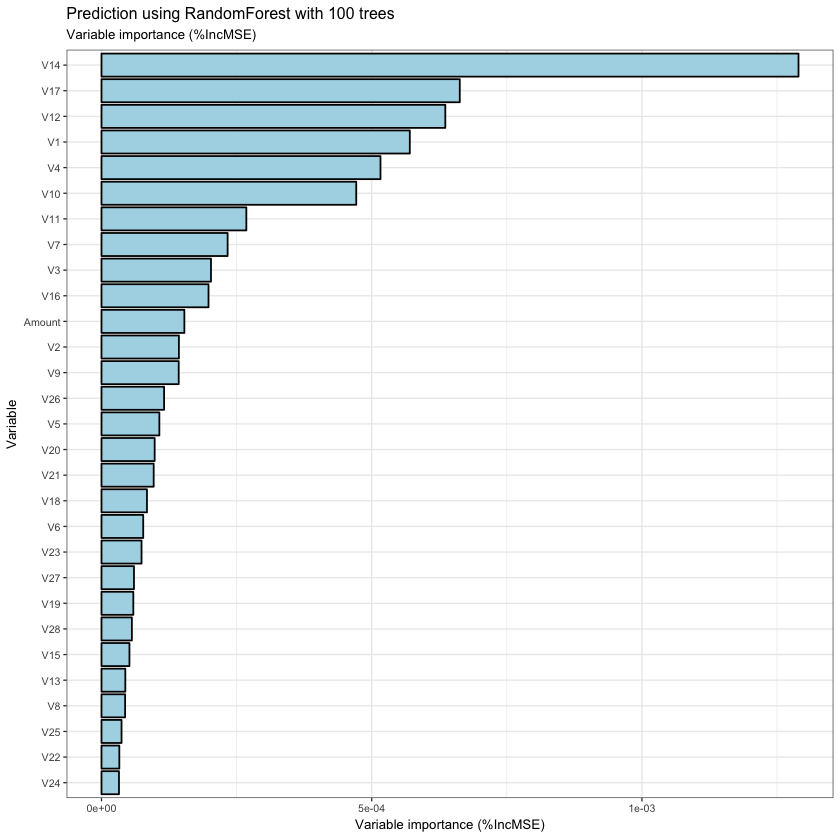

In [18]:
library(ggpubr)

var_imp <- data.frame(rf_dataset$importance)

#gg1 <- ggplot(var_imp, aes(x=reorder(rownames(var_imp),IncNodePurity), y=IncNodePurity)) +
 # geom_bar(stat="identity", fill="tomato", colour="black") +
 # coord_flip() + theme_bw(base_size = 8) +
 # labs(title="Prediction using RandomForest with 100 trees", subtitle="Variable importance (IncNodePurity)", x="Variable", y="Variable importance (IncNodePurity)")
  
gg2 <- ggplot(var_imp, aes(x=reorder(rownames(var_imp),X.IncMSE), y=X.IncMSE)) +
  geom_bar(stat="identity", fill="lightblue", colour="black") +
  coord_flip() + theme_bw(base_size = 8) +
  labs(title="Prediction using RandomForest with 100 trees", subtitle="Variable importance (%IncMSE)", x="Variable", y="Variable importance (%IncMSE)")
gg2
#ggarrange(gg1, gg2, ncol = 2, nrow = 1)

# Modeling the original unbalanced dataset

First we will create a model based on the unbalanced dataset to see the result of prediction and understand the effects of imbalanced dataset on machine learning algorithms.

### Train-Test Split

In [131]:
# Number of rows in the dataset
n_rows <- nrow(dataset)
# You have to set seed every time you want to get a reproducible random result.
set.seed(101)
# Pick randomly 80% of total number of rows in the dataset
idx_train <- sample(1:n_rows, 0.8 * n_rows)
# Define the training set
train_data = dataset[idx_train,]
# Define the test set
test_data = dataset[-idx_train,]


In [132]:
# Print the number of rows and columns in the training and test sets
sprintf("Training set: Number of Rows: %d,    Number of Columns: %d",nrow(train_data), length(names(train_data)))
sprintf("Test set: Number of Rows: %d,    Number of Columns: %d",nrow(test_data), length(names(test_data)))




[1] "Training set: Number of Rows: 227845,    Number of Columns: 30"

[1] "Test set: Number of Rows: 56962,    Number of Columns: 30"

In [133]:
print('Training set')
# Check the percentage of two classes in training set
prop.table(table(train_data$Class))*100



[1] "Training set"



     FALSE       TRUE 
99.8323422  0.1676578 

In [134]:
print('Test set')
# Check the percentage of two classes in test set
prop.table(table(test_data$Class))*100



[1] "Test set"



     FALSE       TRUE 
99.8068888  0.1931112 

### Logistic Regression

In [135]:
# Logistics Regression
glm_imbalanced <- glm(Class ~ ., data = train_data, family = binomial(link="logit"))


In [136]:
# Predict train class based on the logistic regression model
train_data$pred <- predict(glm_imbalanced, newdata=train_data, type="response")
# Predict test class based on the logistic regression model
test_data$pred <- predict(glm_imbalanced, newdata=test_data, type="response")


In order to use the logistic regression as a classifier, you must pick a threshold; scores above the threshold will be classified as positive, those below as negative. When you pick a threshold, you’re trying to balance the precision of the classifier (what fraction of the predicted positives are true positives) and its recall (how many of the true positives the classifier finds).

In [137]:
# Create a simple confusion matrix to see the number of correct and incorrect predictions
conf_mat <- table(pred=test_data$pred>0.5, Class=test_data$Class)
conf_mat


       Class
pred    FALSE  TRUE
  FALSE 56838    36
  TRUE     14    74

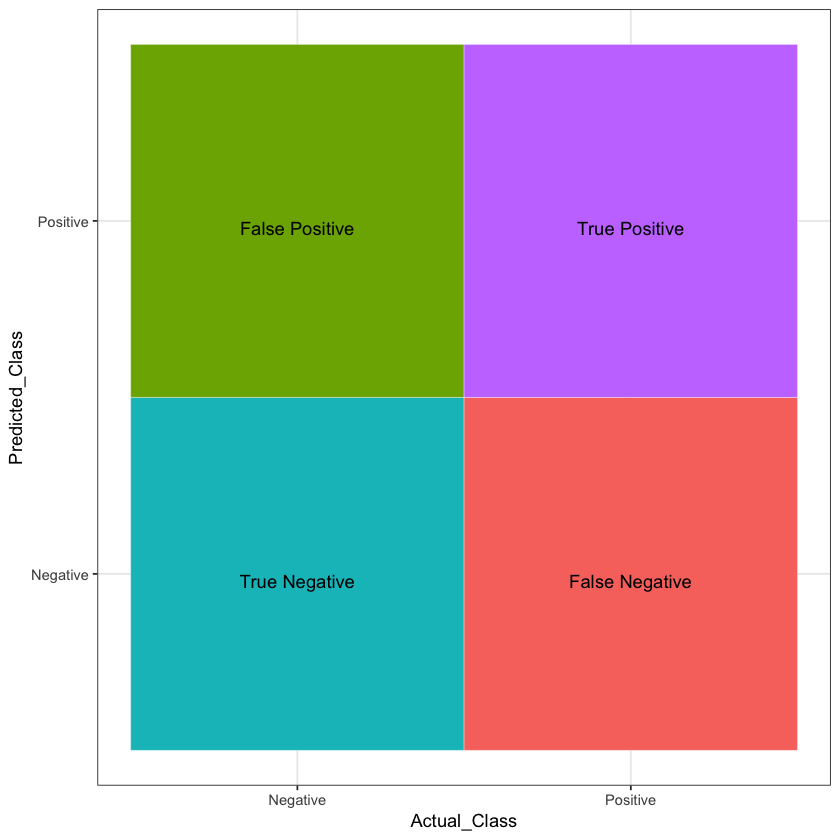

In [191]:
# confusion matrix
Actual_Class <- factor(c('Negative', 'Negative', 'Positive', 'Positive'))
Predicted_Class <- factor(c('Negative', 'Positive', 'Negative', 'Positive'))
Y <- c('True Negative', 'False Positive', 'False Negative', 'True Positive')
df <- data.frame(Actual_Class, Predicted_Class, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = Actual_Class, y = Predicted_Class)) +
  geom_tile( aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%s", Y)), vjust = 1) +
  theme_bw() + theme(legend.position = "none")


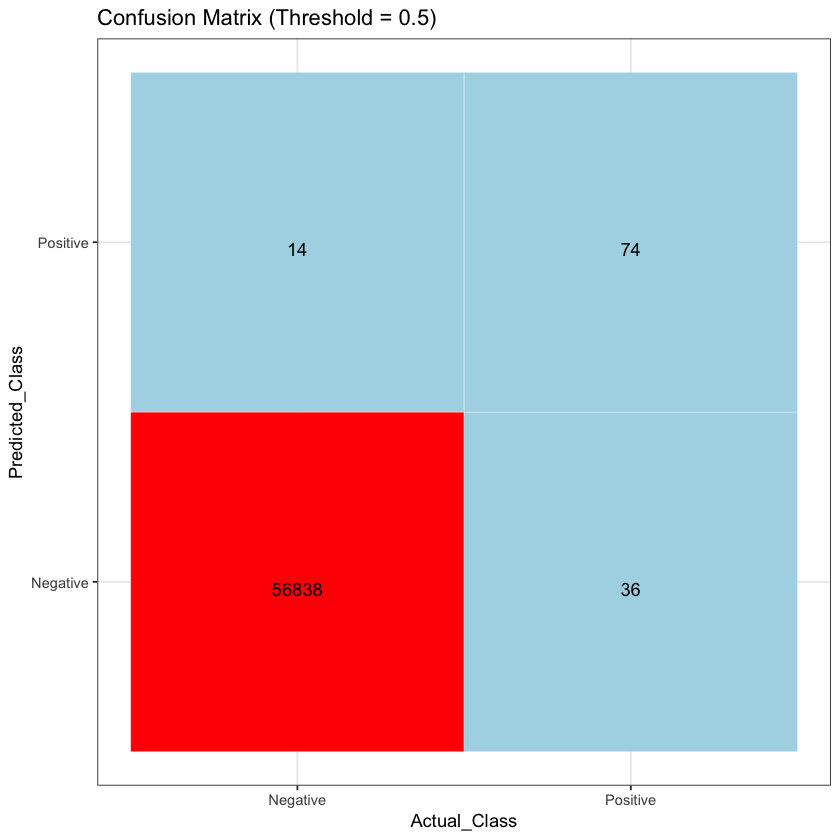

In [192]:
# Plot a visually appealing confusion matrix
Actual_Class <- factor(c('Negative', 'Negative', 'Positive', 'Positive'))
Predicted_Class <- factor(c('Negative', 'Positive', 'Negative', 'Positive'))
Y <- c(56838, 14, 36, 74)
df <- data.frame(Actual_Class, Predicted_Class, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = Actual_Class, y = Predicted_Class)) +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightblue", high = "red") +
  theme_bw() + theme(legend.position = "none") +
  labs(title="Confusion Matrix (Threshold = 0.5)")


### Classification metrics

$$\large Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative} $$

In [145]:
accuracy <- (conf_mat[1,1] + conf_mat[2,2]) / (sum(conf_mat[,1])+sum(conf_mat[,2]))
sprintf('accuracy: %f', accuracy) 
# Another way of calculating the accuracy
# mean((test_data$pred>0.5) == test_data$Class)


[1] "accuracy: 0.999122"

$$\large Precision = \frac{True Positive}{True Positive + False Positive} $$

In [144]:
precision <- conf_mat[2,2]/sum(conf_mat[2,])
sprintf('precision: %f', precision)


[1] "precision: 0.840909"

$$\large Recall = \frac{True Positive}{True Positive + False Negative} $$

In [143]:
recall <- conf_mat[2,2]/sum(conf_mat[,2])
sprintf('recall: %f', recall)


[1] "recall: 0.672727"

$$\large F1 = 2\frac{precision * recall}{precision + recall} $$

In [142]:
F1 <- (2*precision*recall)/(precision+recall)
sprintf('F1: %f', F1)

[1] "F1: 0.747475"

In [200]:
# Calculate precision, recall, F1 scores with the help of 'caret' library
library(caret)

accuracy <- mean((test_data$pred>0.5) == test_data$Class)
sprintf('accuracy: %f', accuracy) 
precision<- posPredValue(factor(test_data$pred > 0.5), test_data$Class, positive="TRUE")
sprintf('precision: %f', precision) 
recall<- sensitivity(factor(test_data$pred > 0.5), test_data$Class, positive="TRUE")
sprintf('recall: %f', recall)
F1<- (2 * precision * recall) / (precision + recall)
sprintf('F1: %f', F1)



[1] "accuracy: 0.999122"

[1] "precision: 0.840909"

[1] "recall: 0.672727"

[1] "F1: 0.747475"

### Change the threshold

In [194]:
conf_mat <- table(pred=test_data$pred>0.02, Class=test_data$Class)
conf_mat


       Class
pred    FALSE  TRUE
  FALSE 56789     9
  TRUE     63   101

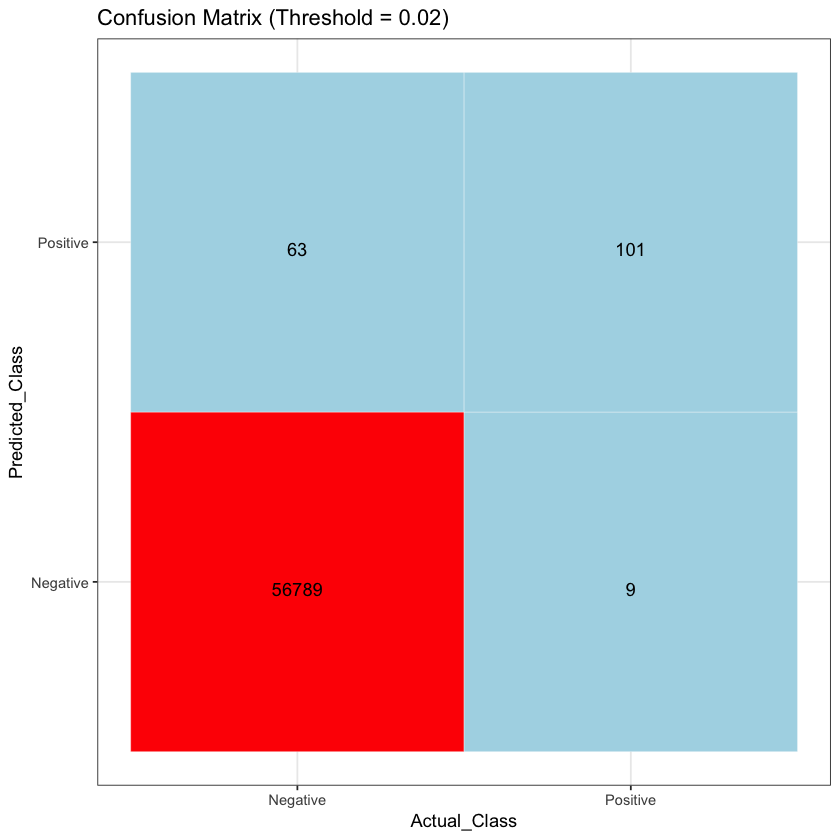

In [195]:
# Plot a visually appealing confusion matrix
Actual_Class <- factor(c('Negative', 'Negative', 'Positive', 'Positive'))
Predicted_Class <- factor(c('Negative', 'Positive', 'Negative', 'Positive'))
Y <- c(56789, 63, 9, 101)
df <- data.frame(Actual_Class, Predicted_Class, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = Actual_Class, y = Predicted_Class)) +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightblue", high = "red") +
  theme_bw() + theme(legend.position = "none") +
  labs(title="Confusion Matrix (Threshold = 0.02)")


# Question

Based on the above confusion matrix, calculate accuracy, precision, recall, and F1 scores for the threshold = 0.02

In [ ]:
# accuracy 


[1] "accuracy: 0.998736"

In [ ]:
# precision 


[1] "precision: 0.615854"

In [ ]:
# recall


[1] "recall: 0.918182"

In [ ]:
# F1


[1] "F1: 0.737226"

### Calculate classification metrics for different thresholds

In [55]:
library(caret)

# Define a function to calculate accuracy, precision, recall, and F1 scores 
# for different thresholds

classification_metrics <- function(test_df){
    
    
    threshold_list <- c(0.001, 0.01, 0.02, 0.04, 0.08, 0.1, 0.3, 0.5, 0.8, 0.999)
    precision_list <- list()
    recall_list <- list()
    F1_list <- list()
    accuracy_list <- list()
    i <- 1
    

    for (threshold in threshold_list){
        
    
        precision_list[i] <- posPredValue(factor(test_df$pred > threshold), test_df$Class, positive="TRUE")
    
        recall_list[i] <- sensitivity(factor(test_df$pred > threshold), test_df$Class, positive="TRUE")

        F1_list[i] <- (2 * precision_list[[i]] * recall_list[[i]]) / (precision_list[[i]] + recall_list[[i]])
     
        accuracy_list[i] <- mean((test_df$pred > threshold ) == test_df$Class)
    
        i <- i + 1
    }
    
    
    metrics <- do.call(rbind, Map(data.frame, threshold=threshold_list, 
                              precision = precision_list,
                              recall = recall_list,
                              F1 = F1_list,
                             Accuracy = accuracy_list))
    
    return(metrics)
        
  
}
                                                            

In [56]:
# Call the function on the test data
unbalanced_metrics <- classification_metrics(test_data)


In [57]:
# Take a look at the result
unbalanced_metrics


threshold,precision,recall,F1,Accuracy
0.001,0.02148997,0.9545455,0.04203363,0.9159791
0.010,0.44588745,0.9363636,0.60410557,0.9976300
0.020,0.61585366,0.9181818,0.73722628,0.9987360
0.040,0.74436090,0.9000000,0.81481481,0.9992100
0.080,0.80000000,0.8727273,0.83478261,0.9993329
0.100,0.79487179,0.8454545,0.81938326,0.9992802
0.300,0.81730769,0.7727273,0.79439252,0.9992276
0.500,0.84090909,0.6727273,0.74747475,0.9991222
0.800,0.84057971,0.5272727,0.64804469,0.9988940
0.999,0.80645161,0.2272727,0.35460993,0.9984024


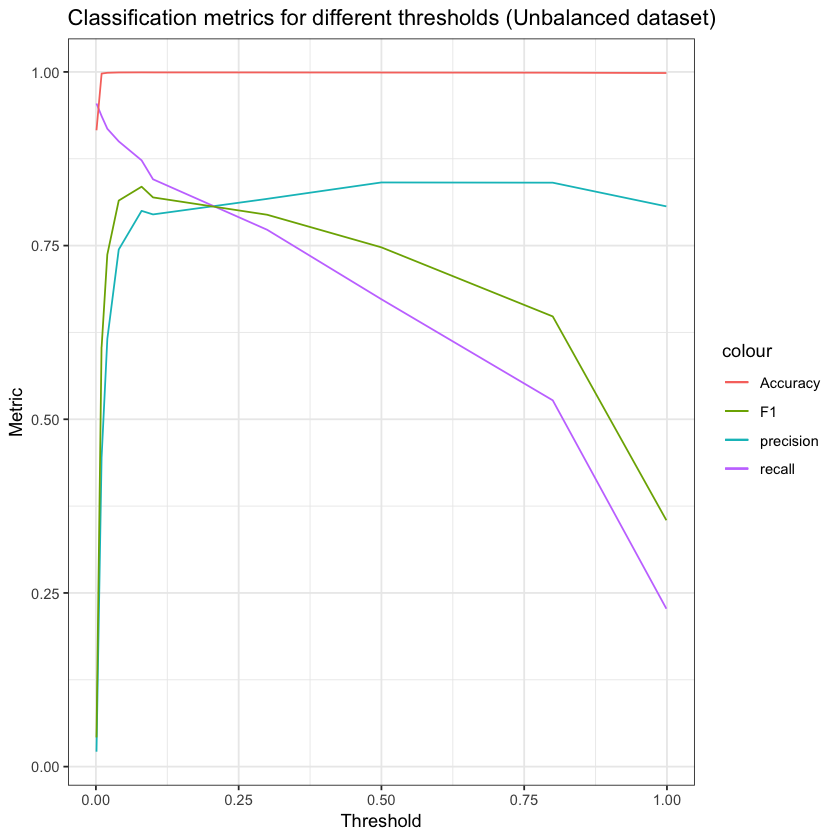

In [118]:
# Call 'ggplot2' library
library(ggplot2)
# plot the result
ggplot(unbalanced_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Unbalanced dataset)",
       x="Threshold", y = "Metric") +
  theme_bw()
  

### ROC Curve, Precision-Recall plot

In [113]:
install.packages('ggrepel')
library(ggrepel)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


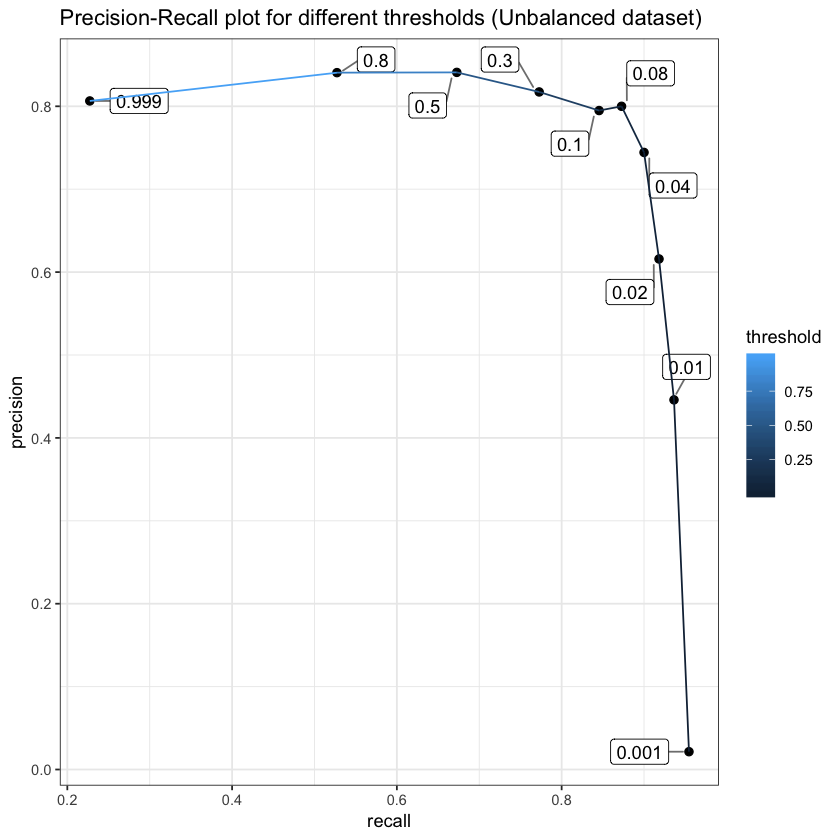

In [117]:
ggplot(unbalanced_metrics, aes(x = recall, y = precision)) + 
geom_point(size = 2) + 
#geom_text(aes(label=threshold),hjust=0, vjust=0)+
geom_label_repel(aes(label = threshold),
                  box.padding   = 0.35, 
                  point.padding = 0.5,
                  segment.color = 'grey50')+
geom_line(aes(color = threshold)) +
theme_bw()+
labs(title="Precision-Recall plot for different thresholds (Unbalanced dataset)")


# Question

Based on the above graph, choose a threshold between 0.04 and 0.08 to achieve a recall greater than 0.8, and a precision greater than 0.7. Then construct a confusion matrix and calculate four classification metrics (accuracy, precision, recall, F1) with that threshold.

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


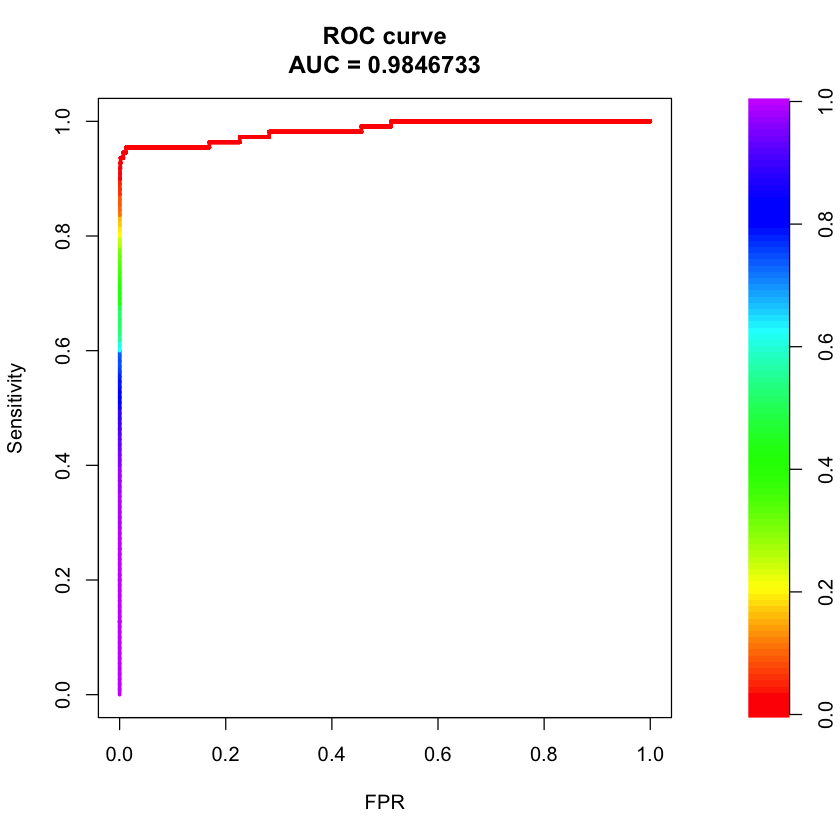

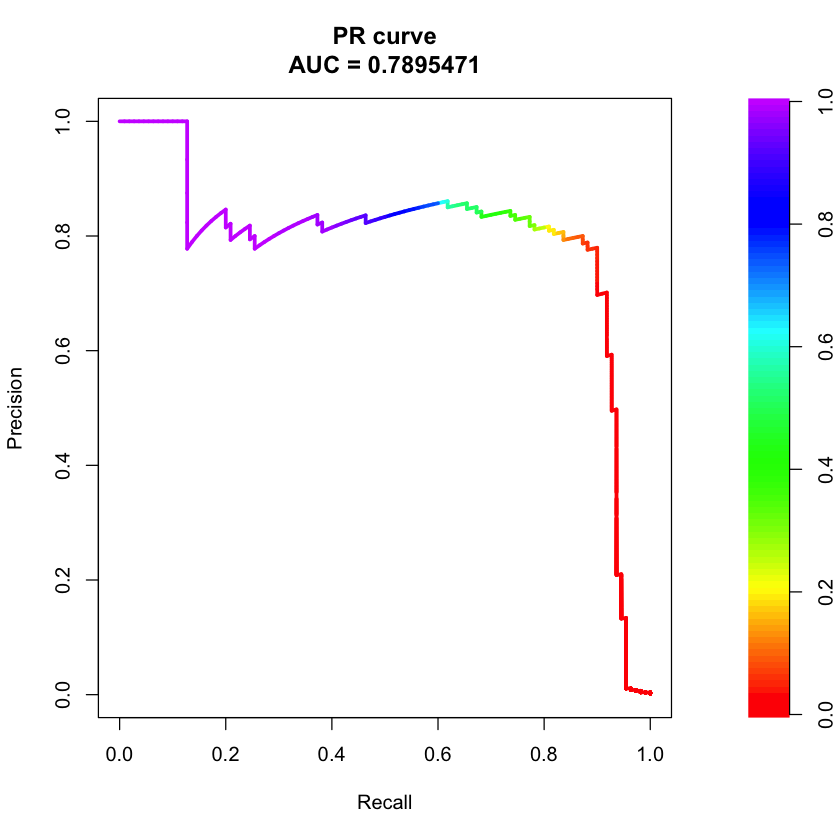

In [75]:
# Creat ROC curve and precision-recall plot with the help of 'PRROC' package
# install.packages("PRROC")
library(PRROC)

fg <- test_data$pred[test_data$Class == TRUE]
bg <- test_data$pred[test_data$Class == FALSE]

# ROC Curve    
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)

# PR Curve
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)


# How to balance data for modeling


## Under-sampling

With under-sampling, we randomly select a subset of samples from the class with more instances to match the number of samples coming from each class. In this scenario, our new dataset will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. In our example, we would randomly pick 492 out of the 284315 non-fraud cases. The main disadvantage of under-sampling is that we loose potentially relevant information from the left-out samples.

In [146]:
# Number of fraud observations
nrows_fraud <- nrow(subset(dataset, dataset$Class == 'TRUE'))
# Fraud data
fraud_data <- subset(dataset, dataset$Class == 'TRUE')
# indices of fraud observations
fraud_idx <- as.numeric(rownames(fraud_data))
# Number of non-fraud observations
nrows_nonfraud <- nrow(subset(dataset, dataset$Class == 'FALSE'))
# Non-Fraud data
nonfraud_data <- subset(dataset, dataset$Class == 'FALSE')
# indices of non-fraud observations
nonfraud_idx <- as.numeric(rownames(nonfraud_data))
# You have to set seed every time you want to get a reproducible random result.
set.seed(101)
# Randomly select 'nrows_fraud' observations from 'nrows_nonfraud' data points
idx_nonfraud <- sample(1:nrows_nonfraud, nrows_fraud, replace = FALSE)
# Define the sampled non-fraud data
sample_nonfraud_data <- nonfraud_data[idx_nonfraud,]
# Combine the sampled non-fraud data and fraud data
undersample_dataset <- rbind(fraud_data, sample_nonfraud_data)


# Question

Calculate the number of fraud and non-fraud transactions in the under-sampled dataset.


FALSE  TRUE 
  492   492 

In [148]:
# Check the percentage of two classes
prop.table(table(undersample_dataset$Class))*100




FALSE  TRUE 
   50    50 

In [149]:
# Number of rows
n_rows <- nrow(undersample_dataset)
# You have to set seed every time you want to get a reproducible random result.
set.seed(101)
# Randomly pick 80% of total number of rows
idx_data <- sample(1:n_rows, 0.8 * n_rows)
# Training set
undersample_train_data = undersample_dataset[idx_data,]
# Test set
undersample_test_data = undersample_dataset[-idx_data,]


In [150]:
# Check the percentage of two classes in training set
prop.table(table(undersample_train_data$Class))*100




   FALSE     TRUE 
50.69886 49.30114 

In [151]:
# Check the percentage of two classes in test set
prop.table(table(undersample_test_data$Class))*100




   FALSE     TRUE 
47.20812 52.79188 

### Logistic Regression with Under-sampling

In [152]:
# Logistics Regression
glm_undersample <- glm(Class ~ ., data = undersample_train_data, family = binomial(link="logit"))



Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [153]:
# Predict the classes for the training set
undersample_train_data$pred <- predict(glm_undersample, newdata=undersample_train_data, type="response")
# Predict the classes for the test set
undersample_test_data$pred <- predict(glm_undersample, newdata=undersample_test_data, type="response")



In [154]:
# Call the classification_metrics function on the under-sampled test data
undersample_metrics <- classification_metrics(undersample_test_data)


In [155]:
# See the table
undersample_metrics


threshold,precision,recall,F1,Accuracy
0.001,0.6459627,1.0000000,0.7849057,0.7106599
0.010,0.7285714,0.9807692,0.8360656,0.7969543
0.020,0.7769231,0.9711538,0.8632479,0.8375635
0.040,0.8461538,0.9519231,0.8959276,0.8832487
0.080,0.9158879,0.9423077,0.9289100,0.9238579
0.100,0.9142857,0.9230769,0.9186603,0.9137056
0.300,0.9892473,0.8846154,0.9340102,0.9340102
0.500,1.0000000,0.8846154,0.9387755,0.9390863
0.800,1.0000000,0.8750000,0.9333333,0.9340102
0.999,1.0000000,0.8173077,0.8994709,0.9035533


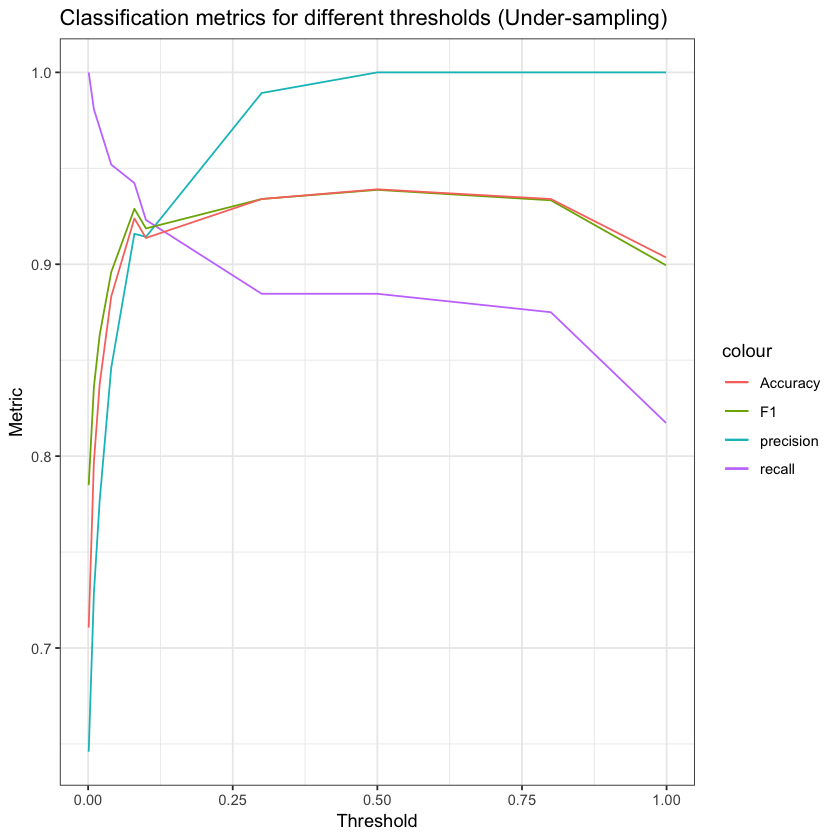

In [156]:
library(ggplot2)

ggplot(undersample_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Under-sampling)",
       x="Threshold", y = "Metric")+
  theme_bw() 
  

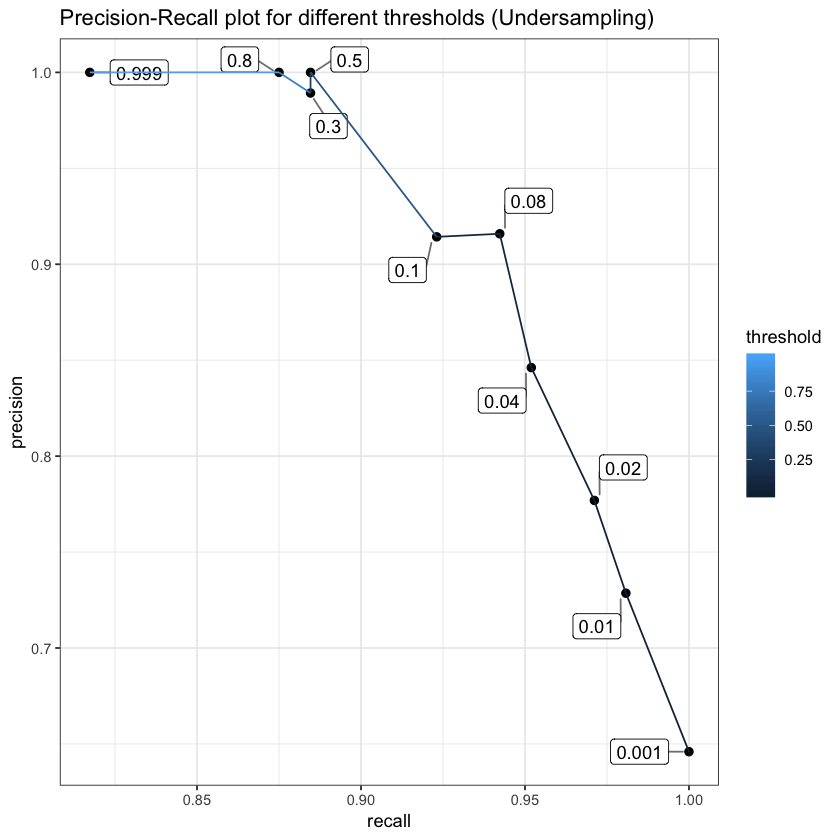

In [157]:
ggplot(undersample_metrics, aes(x = recall, y = precision)) + 
geom_point(size = 2) + 
#geom_text(aes(label=threshold),hjust=0, vjust=0)+
geom_label_repel(aes(label = threshold),
                  box.padding   = 0.35, 
                  point.padding = 0.5,
                  segment.color = 'grey50')+
geom_line(aes(color = threshold)) +
theme_bw()+
labs(title="Precision-Recall plot for different thresholds (Undersampling)")



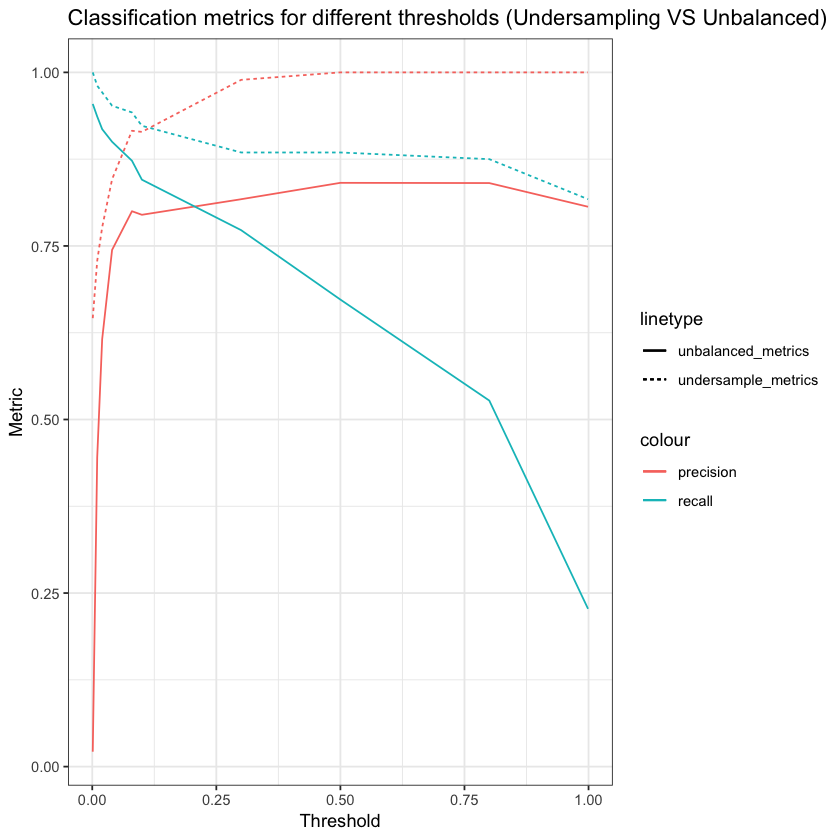

In [158]:
ggplot() + 
  geom_line(data = undersample_metrics, 
            aes(x = threshold, y = precision, colour = "precision", linetype="undersample_metrics")) +
  geom_line(data = undersample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="undersample_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="unbalanced_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="unbalanced_metrics")) +
  theme_bw() +
  labs(title="Classification metrics for different thresholds (Undersampling VS Unbalanced)",
       x="Threshold", y = "Metric") 



## Oversampling

With oversampling, we randomly duplicate samples from the class with fewer instances or we generate additional instances based on the data that we have, so as to match the number of samples in each class. While we avoid losing information with this approach, we also run the risk of overfitting our model as we are more likely to get the same samples in the training and in the test data, i.e. the test data is no longer independent from training data. This would lead to an overestimation of our model’s performance and generalizability.

In [159]:
# Number of fraud observations
nrows_fraud <- nrow(subset(dataset, dataset$Class == 'TRUE'))
# Fraud data
fraud_data <- subset(dataset, dataset$Class == 'TRUE')
# Number of non-fraud observations
nrows_nonfraud <- nrow(subset(dataset, dataset$Class == 'FALSE'))
# Non-Fraud data
nonfraud_data <- subset(dataset, dataset$Class == 'FALSE')
# You have to set seed every time you want to get a reproducible random result.
set.seed(101)
# Randomly select 'nrows_nonfraud' observations from 'nrows_fraud' data points
idx_fraud <- sample(1:nrows_fraud, nrows_nonfraud, replace = TRUE)
# Sampled fraud data
sample_fraud_data <- fraud_data[idx_fraud,]
# Combine sampled fraud data and non-fraud data
oversample_dataset <- rbind(nonfraud_data, sample_fraud_data)


In [160]:
# Check number of fraud and non-fraud transactions
table(oversample_dataset$Class)




 FALSE   TRUE 
284315 284315 

In [161]:
# Check the percentage of two classes
prop.table(table(oversample_dataset$Class))*100




FALSE  TRUE 
   50    50 

In [162]:
# Number of rows
n_rows <- nrow(oversample_dataset)
# Randomly select 'nrows_nonfraud' observations from 'nrows_fraud' data points
set.seed(101)
# Randomly pick 80% of total number of rows for the training set
idx_data <- sample(1:n_rows, 0.8 * n_rows)
# Training set
oversample_train_data = oversample_dataset[idx_data,]
# Test set
oversample_test_data = oversample_dataset[-idx_data,]



# Question

Calculate the percentage of fraud and non-fraud observations in the oversampled training dataset.


   FALSE     TRUE 
50.01319 49.98681 

# Question

Calculate the percentage of fraud and non-fraud observations in the oversampled test dataset.


   FALSE     TRUE 
49.94724 50.05276 

### Logistic Regression with Oversampling

In [165]:
# Logistics Regression
glm_oversample <- glm(Class ~ ., data = oversample_train_data, family = binomial(link="logit"))




Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [166]:
# Prediction for the training set
oversample_train_data$pred <- predict(glm_oversample, newdata=oversample_train_data, type="response")
# Prediction for the test set
oversample_test_data$pred <- predict(glm_oversample, newdata=oversample_test_data, type="response")



In [167]:
# Call the classification_metrics function on the oversampled test data
oversample_metrics <- classification_metrics(oversample_test_data)


In [168]:
# See the table
oversample_metrics


threshold,precision,recall,F1,Accuracy
0.001,0.5127551,1.0000000,0.6779090,0.5243744
0.010,0.5539251,1.0000000,0.7129366,0.5969259
0.020,0.6029941,0.9977162,0.7516875,0.6700667
0.040,0.6872587,0.9914622,0.8117979,0.7699031
0.080,0.7929845,0.9853135,0.8787485,0.8639010
0.100,0.8241446,0.9829419,0.8965661,0.8864815
0.300,0.9435647,0.9410783,0.9423199,0.9423351
0.500,0.9755019,0.9226850,0.9483587,0.9497037
0.800,0.9911148,0.8896580,0.9376499,0.9407787
0.999,0.9991152,0.8133268,0.8966987,0.9062044


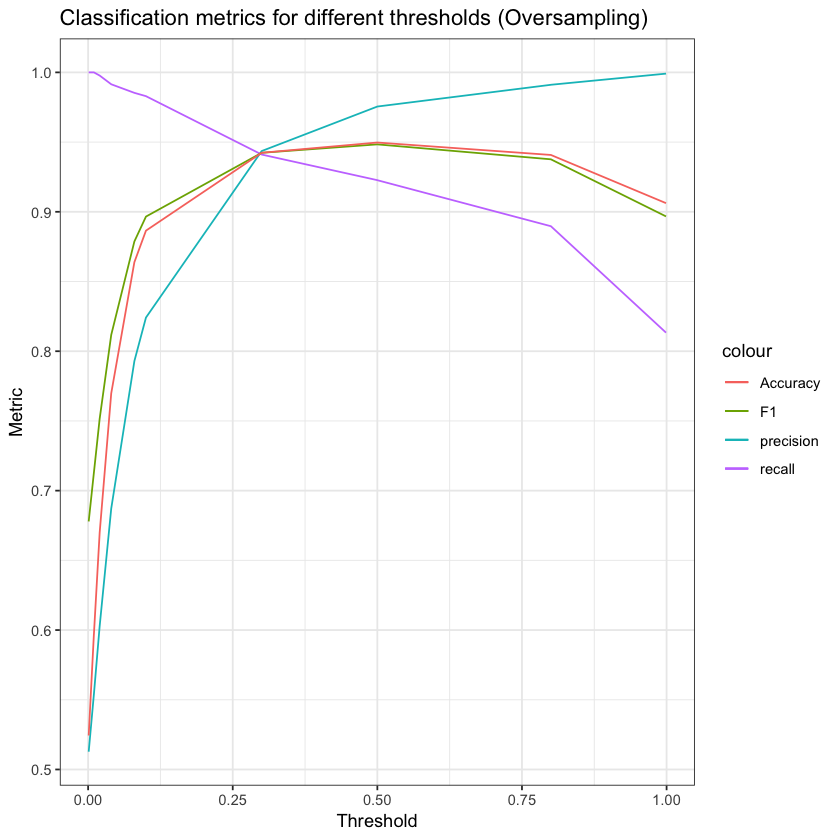

In [169]:
library(ggplot2)

ggplot(oversample_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Oversampling)",
       x="Threshold", y = "Metric") +
  theme_bw()
  

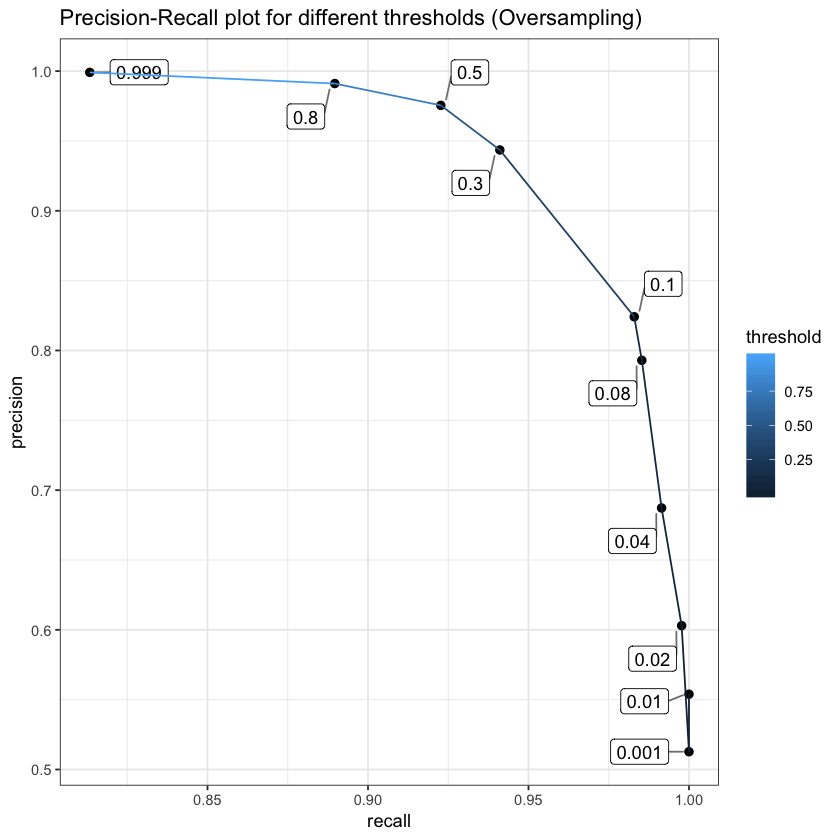

In [170]:
ggplot(oversample_metrics, aes(x = recall, y = precision)) + 
geom_point(size = 2) + 
#geom_text(aes(label=threshold),hjust=0, vjust=0)+
geom_label_repel(aes(label = threshold),
                  box.padding   = 0.35, 
                  point.padding = 0.5,
                  segment.color = 'grey50')+
geom_line(aes(color = threshold)) +
theme_bw()+
labs(title="Precision-Recall plot for different thresholds (Oversampling)")




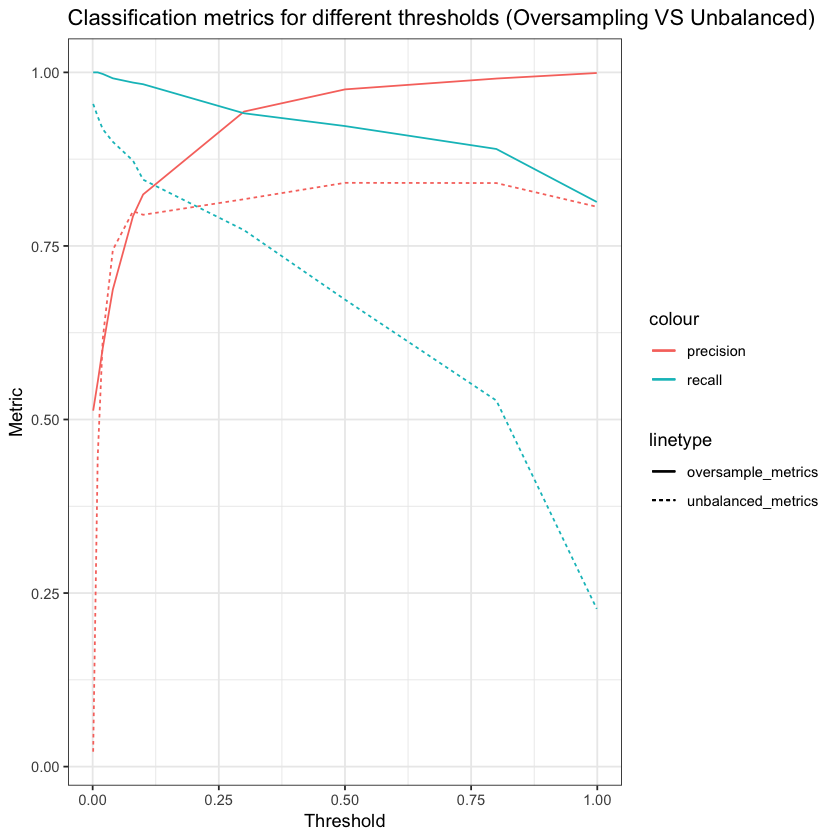

In [172]:
ggplot() + 
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="oversample_metrics")) +
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="oversample_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="unbalanced_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="unbalanced_metrics")) +
  theme_bw() +
  labs(title="Classification metrics for different thresholds (Oversampling VS Unbalanced)",
       x="Threshold", y = "Metric") 



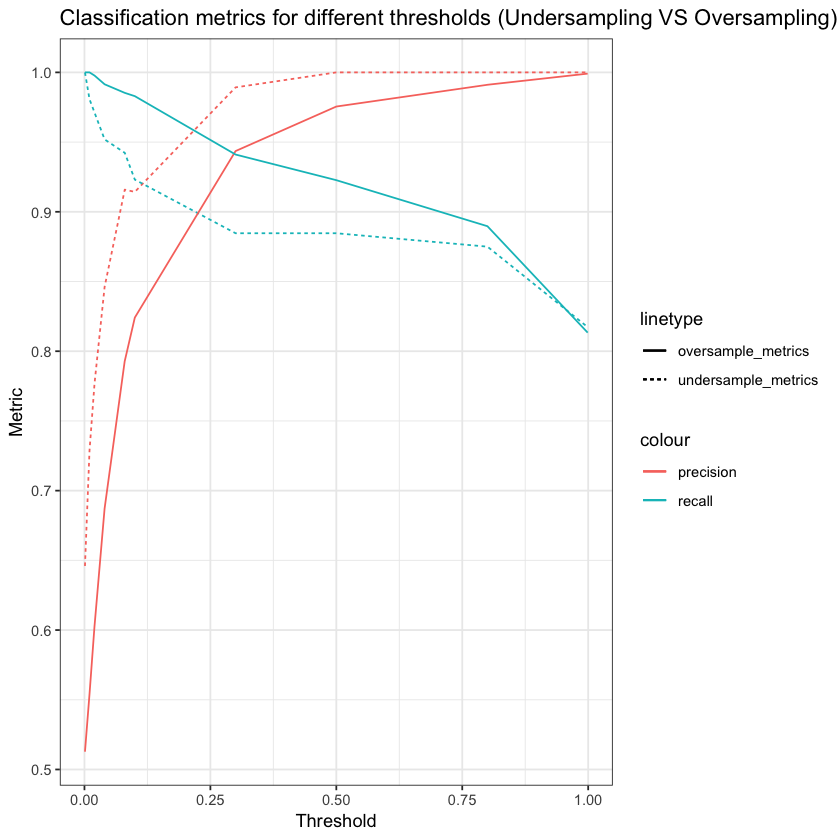

In [173]:

ggplot() + 
  geom_line(data = undersample_metrics, 
            aes(x = threshold, y = precision, colour = "precision", linetype="undersample_metrics")) +
  geom_line(data = undersample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="undersample_metrics")) +
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="oversample_metrics")) +
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="oversample_metrics")) +
  theme_bw() +
  labs(title="Classification metrics for different thresholds (Undersampling VS Oversampling)",
       x="Threshold", y = "Metric")
   

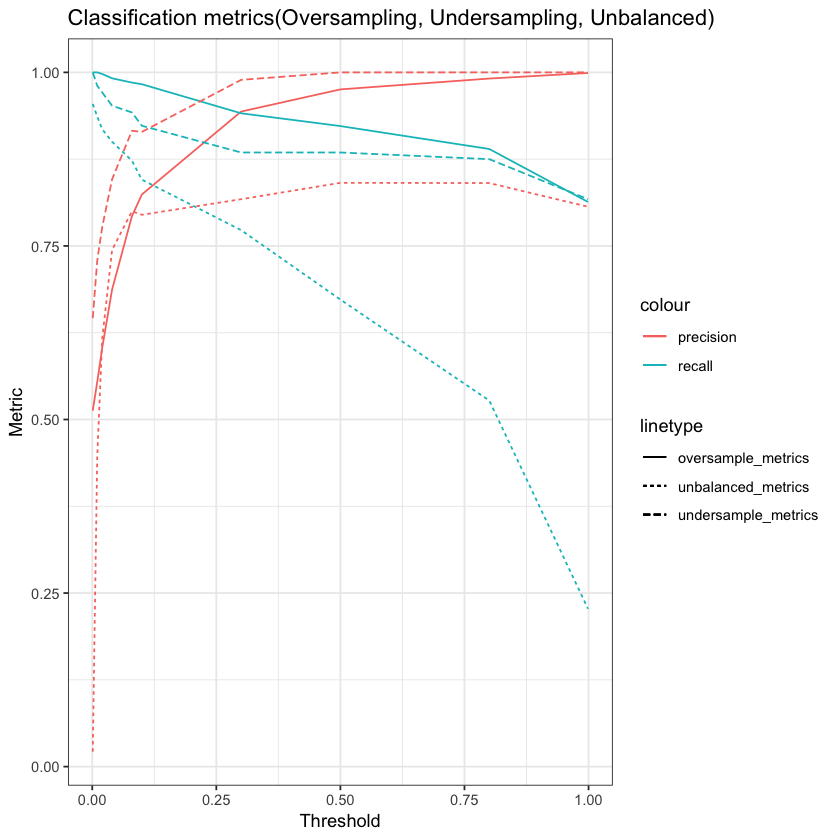

In [174]:
ggplot() + 
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="oversample_metrics")) +
  geom_line(data = oversample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="oversample_metrics")) +
  geom_line(data = undersample_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="undersample_metrics")) +
  geom_line(data = undersample_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="undersample_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = precision, colour = "precision", linetype="unbalanced_metrics")) +
  geom_line(data = unbalanced_metrics, 
            aes(x = threshold,y = recall, colour = "recall", linetype="unbalanced_metrics")) +
  theme_bw() +
  labs(title="Classification metrics(Oversampling, Undersampling, Unbalanced)",
       x="Threshold", y = "Metric") 


# Question

Compare accuracy of three different approaches (unbalanced, under-sampling, oversampling) for different thresholds with the help of ggplot. Use three different datasets we have created before (unbalanced_metrics, undersample_metrics, oversample_metrics) to create your plot.

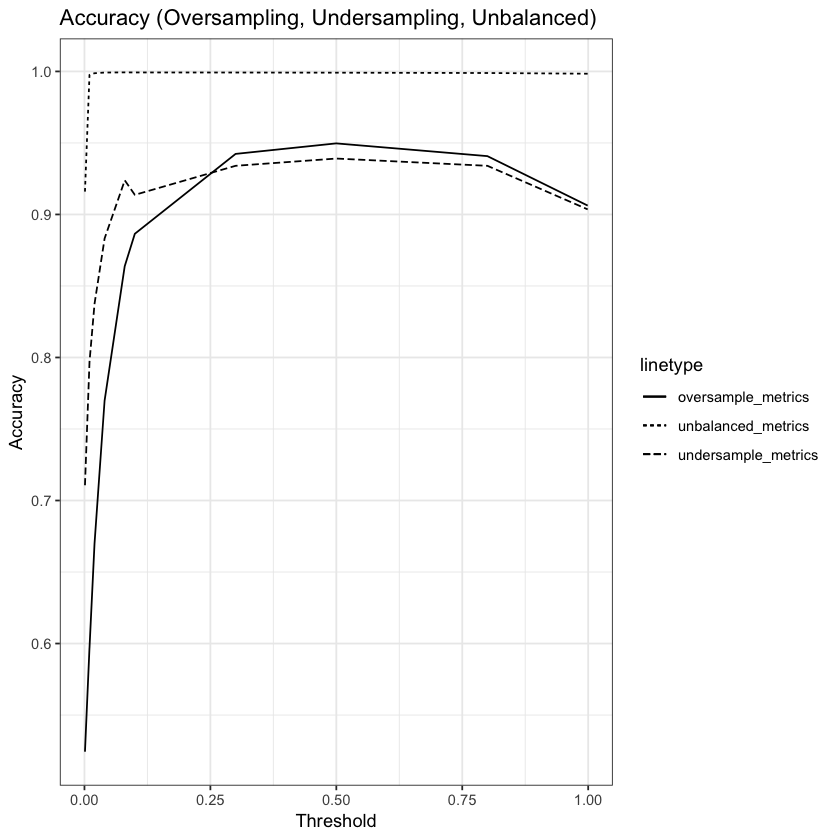